# Churn Case Study

## Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]


<img src="https://images.pexels.com/photos/3078/home-dialer-siemens-telephone.jpg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" style="width:400px">

**Client**: Telco Company in the USA offering triple play (phone, internet and TV).

New competitor entered offering triple play, resulting in increased churn.

Want better way to spot potential churning customers and suggested actions what to do.

## **Assignment**

- Define the business problem
- Determine which evaluation metric you find appropriate:
   - accuracy
   - precision
   - recall
   - f1 score
- Determine which type of slice/segment/type of churn you are interested
- Run "data prep code"
- Use logistic regression to create 2-3 model specifications
  - model 1 (vanilla model): uses cleaned data as is, find best cutoff using chosen metric
  - model 2: create at least **2 new features** and add them to the model
  - model 3 (if time, a 'reach' model): increase the LASSO penalty to decrease the feature set
- Pick the "best" model and find the "best" threshold
- Use "best" model to identify the drivers of churn in your segment analysis and make recommendations for the company
- Each group will have 5 minutes to present their recommendations to the rest of the class. Make sure to share:
   - segment you chose
   - evaluation metric you chose based on the business problem
   - evaluation metric of "best" model's threshold & threshold
   - what drives churn and what are your recommendations
   - **if you had more time** what would you work on?

## Data

<img src="https://images.pexels.com/photos/53621/calculator-calculation-insurance-finance-53621.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" style = "width:400px" >
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information 
     - how long they’ve been a customer (tenure is in months)
     - contract, payment method, paperless billing, monthly charges, and total charges
     - all "totals" are over the length of the contract
- Demographic info about customers – gender, age range, and if they have partners and dependents
- Usage
    - information about their usage patterns
    - again, usage totals are over length of contract

## Concept: Churn

#### Type of churn:

**Voluntary** – they left after contract was up

**Involuntary** – we fired them

**Early churn** – left early, broke contract

### Churn is a survival problem:
- Predicting who will churn next month is really hard
- Predicting who may churn over next 3 months is easier

<img src = "./img/funnel.png" style="width:800px">

There are many reasons to churn &#8594; **feature engineering is king**

### Solutions need to be tied to root problems

<img src = "./img/solution.png" style="width:800px">

### Different solutions have different time frames

<img src = "./img/time.png" style="width:800px">

## Remember:

#### You will not be paid to create intricate models
### You will be paid to **Solve Problems**

# Get Started!

## Part 1: Business problem

#### End Users: 
Business decision makers: CEO and business marketing officers



#### True business problem:
Create actionable plans to reduce the actual churn rate amongst customers and identify the type of churns with the most business impact


#### Context:

- **False negative** 
    - **Outcome**: We predict that the clients won't churn but they do 
- **False positive**
    - **Outcome**: We predict that the clients will churn but they will not

## Part 2: Evaluation Metric
Which metric (of the ones we've explore so far) would make sense to primarily use as we evaluate our models?

- Accuracy
- Precision
- Recall
- F1-Score

We should focus on Recall (primary) and F1-Score(secondary)

## Part 3: Segment choice

What type slice/segment/type of churn you are interested in?

Initial hypothesis: We would like to reduce early churn since it has the biggest revenue impact

## Part 4: Data Prep Code

In [226]:
# Import pacakges
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix # New to version 0.22.2

# Load dataset
url_link = 'https://docs.google.com/spreadsheets/d/1TAWfdKnWYiCzKUeDyGL6NzIOv7AxFt_Sfzzax464_FQ/export?format=csv&gid=882919979'
telco = pd.read_csv(url_link)

# Drop nas
telco.dropna(inplace=True)

# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(telco.drop(columns=['customerID','Churn']), np.where(telco.Churn =="Yes", 1, 0), test_size=0.33, random_state=42)

# Separate out numeric from categorical variables
cat_var = telco.select_dtypes(include='object')
cat_var.drop(columns=['customerID','Churn'], inplace = True)

num_var = telco.select_dtypes(exclude = 'object') 

# Encode categorical variables
ohc = OneHotEncoder(drop='first')
encoded_cat = ohc.fit_transform(X_train[cat_var.columns.tolist()]).toarray()

# Add feature names to encoded vars
encoded=pd.DataFrame(encoded_cat, columns=ohc.get_feature_names(cat_var.columns.tolist()))
encoded.reset_index(inplace=True, drop=True)
X_train.reset_index(inplace=True, drop=True)

# Reassemble entire training dataset
clean_X_train = pd.concat([X_train[num_var.columns.tolist()] , encoded], axis=1,  sort=False)
clean_X_train.shape


/Users/colm-m-farrell/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(2229, 42)

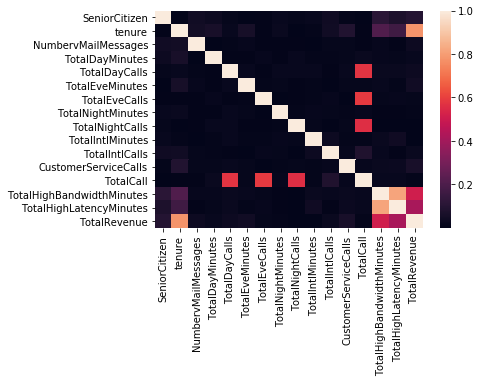

In [227]:
import seaborn as sns
sns.heatmap(telco.corr().abs())

In [228]:
# Encode categorical variables
encoded_cat = ohc.fit_transform(X_test[cat_var.columns.tolist()]).toarray()

# Add feature names to encoded vars
encoded=pd.DataFrame(encoded_cat, columns=ohc.get_feature_names(cat_var.columns.tolist()))
encoded.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

# Reassemble entire training dataset
clean_X_test = pd.concat([X_test[num_var.columns.tolist()] , encoded], axis=1,  sort=False)
clean_X_test.shape

(1099, 42)

In [229]:
clean_X_train.columns

Index(['SeniorCitizen', 'tenure', 'NumbervMailMessages', 'TotalDayMinutes',
       'TotalDayCalls', 'TotalEveMinutes', 'TotalEveCalls',
       'TotalNightMinutes', 'TotalNightCalls', 'TotalIntlMinutes',
       'TotalIntlCalls', 'CustomerServiceCalls', 'TotalCall',
       'TotalHighBandwidthMinutes', 'TotalHighLatencyMinutes', 'TotalRevenue',
       'gender_Male', 'MaritalStatus_Yes', 'Dependents_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
 

In [230]:
clean_X_train.isna()

,SeniorCitizen,tenure,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternationalPlan_Yes,VoiceMailPlan_Yes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2225,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2226,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2227,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [231]:

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(clean_X_test, 30))


# print("Redundant pairs")
# get_redundant_pairs(clean_X_test)

Top Absolute Correlations
InternetService_No                    StreamingTV_No internet service         1.000000
OnlineSecurity_No internet service    DeviceProtection_No internet service    1.000000
InternetService_No                    DeviceProtection_No internet service    1.000000
                                      TechSupport_No internet service         1.000000
                                      StreamingMovies_No internet service     1.000000
OnlineBackup_No internet service      StreamingMovies_No internet service     1.000000
OnlineSecurity_No internet service    OnlineBackup_No internet service        1.000000
OnlineBackup_No internet service      StreamingTV_No internet service         1.000000
TechSupport_No internet service       StreamingTV_No internet service         1.000000
InternetService_No                    OnlineBackup_No internet service        1.000000
OnlineSecurity_No internet service    TechSupport_No internet service         1.000000
TechSupport_No in

In [232]:
clean_X_train.head()
# if tenure less than contract_one year or contract_two year && churn == 1, then they qualify as early churn

,SeniorCitizen,tenure,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternationalPlan_Yes,VoiceMailPlan_Yes
0,0,1,0,97.2,88,155.6,85,261.6,105,12.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,58,34,138.8,80,142.0,108,183.8,77,11.8,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0,1,0,179.7,128,299.8,92,185.3,120,7.6,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,4,0,298.4,78,270.5,142,107.3,84,12.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,1,0,189.3,77,155.9,128,186.0,83,7.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

from IPython.display import display, HTML

In [234]:
lgrg1 = LogisticRegression(random_state = 100)

## Part 5: Create models

# Model 1: Vanilla

In [242]:
ss = StandardScaler()

In [243]:
X_test.head()

,gender,SeniorCitizen,MaritalStatus,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalHighBandwidthMinutes,TotalHighLatencyMinutes,TotalRevenue
0,Male,0,Yes,Yes,55,Yes,No,DSL,No,No,...,91,221.6,77,11.6,1,1,269,159,12,3119.9
1,Female,0,Yes,Yes,37,Yes,No,No,No internet service,No internet service,...,70,220.6,97,7.2,9,2,276,0,0,683.8
2,Female,0,No,No,4,Yes,No,Fiber optic,Yes,No,...,83,147.7,114,5.3,4,6,278,256,33,387.2
3,Female,0,Yes,No,64,Yes,No,Fiber optic,Yes,No,...,94,172.7,107,7.1,9,3,317,1335,253,6314.4
4,Male,0,No,No,9,Yes,Yes,Fiber optic,No,Yes,...,77,197.3,138,10.5,2,2,322,2854,542,918.8


In [244]:
X_train_transformed = ss.fit_transform(clean_X_train)
X_test_transformed = ss.transform(clean_X_test)

In [245]:
lgrg1.fit(X_train_transformed, y_train)
y_pred_train = lgrg1.predict(X_train_transformed)
y_pred_test = lgrg1.predict(X_test_transformed)

In [246]:
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric_function in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric_function(y_train, y_pred_train):.4f}")
    print(f"TEST: {metric_function(y_test, y_pred_test):.4f}")
    print("*" * 15)

Accuracy:
TRAIN: 0.8694
TEST: 0.8471
***************
Recall:
TRAIN: 0.5399
TEST: 0.5066
***************
Precision:
TRAIN: 0.7077
TEST: 0.6725
***************
F1-Score:
TRAIN: 0.6125
TEST: 0.5779
***************


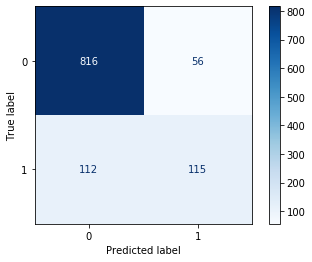

In [247]:
plot_confusion_matrix(lgrg1, X_test_transformed, y_test,
                      cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g") # Formatting the numbers properly
plt.show()

In [283]:
Looks like false negatives are very high, need to find a better model

SyntaxError: invalid syntax (<ipython-input-283-49ff8087536e>, line 1)

# Model 2: Feature Engineering

In [284]:
lgrg2 = LogisticRegression(random_state = 100)

X_train_eng = clean_X_train
X_test_eng = clean_X_test

In [285]:
clean_X_train

,SeniorCitizen,tenure,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternationalPlan_Yes,VoiceMailPlan_Yes
0,0,1,0,97.200000,88.000000,155.600000,85.000000,261.600000,105.000000,12.400000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,58,34,2.393103,1.379310,2.448276,1.862069,3.168966,1.327586,0.203448,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0,1,0,179.700000,128.000000,299.800000,92.000000,185.300000,120.000000,7.600000,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,4,0,74.600000,19.500000,67.625000,35.500000,26.825000,21.000000,3.050000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,1,0,189.300000,77.000000,155.900000,128.000000,186.000000,83.000000,7.400000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,0,3,26,56.833333,35.666667,72.400000,25.666667,75.233333,23.666667,4.533333,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2225,0,35,0,3.697143,2.771429,5.297143,2.885714,5.848571,3.028571,0.031429,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2226,0,24,0,3.412500,3.125000,10.575000,4.750000,8.879167,5.208333,0.370833,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2227,0,64,37,2.554688,1.203125,3.173437,1.593750,3.625000,1.359375,0.121875,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [286]:
ColList = ['TotalDayMinutes','TotalDayCalls', 'TotalEveMinutes', 'TotalEveCalls','TotalNightMinutes', 'TotalNightCalls', 'TotalIntlMinutes','TotalIntlCalls', 'CustomerServiceCalls', 'TotalCall', 'TotalHighBandwidthMinutes', 'TotalHighLatencyMinutes', 'TotalRevenue']

for i in ColList:
    X_train_eng[i] = X_train_eng.apply(lambda row: ((row[i]) / (row['tenure'])), axis=1)
    X_test_eng[i] = X_test_eng.apply(lambda row: ((row[i]) / (row['tenure'])), axis=1)


In [287]:
X_train_eng

,SeniorCitizen,tenure,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternationalPlan_Yes,VoiceMailPlan_Yes
0,0,1,0,97.200000,88.000000,155.600000,85.000000,261.600000,105.000000,12.400000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,58,34,0.041260,0.023781,0.042212,0.032105,0.054637,0.022889,0.003508,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0,1,0,179.700000,128.000000,299.800000,92.000000,185.300000,120.000000,7.600000,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,4,0,18.650000,4.875000,16.906250,8.875000,6.706250,5.250000,0.762500,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,1,0,189.300000,77.000000,155.900000,128.000000,186.000000,83.000000,7.400000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,0,3,26,18.944444,11.888889,24.133333,8.555556,25.077778,7.888889,1.511111,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2225,0,35,0,0.105633,0.079184,0.151347,0.082449,0.167102,0.086531,0.000898,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2226,0,24,0,0.142187,0.130208,0.440625,0.197917,0.369965,0.217014,0.015451,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2227,0,64,37,0.039917,0.018799,0.049585,0.024902,0.056641,0.021240,0.001904,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [288]:
# Transform, Fit and Predict

X_train_transformed = ss.fit_transform(X_train_eng)
X_test_transformed = ss.transform(X_test_eng)

lgrg2.fit(X_train_eng, y_train)
y_pred_train = lgrg2.predict(X_train_eng)
y_pred_test = lgrg2.predict(X_test_eng)

/Users/colm-m-farrell/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [289]:
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric_function in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric_function(y_train, y_pred_train):.4f}")
    print(f"TEST: {metric_function(y_test, y_pred_test):.4f}")
    print("*" * 15)

Accuracy:
TRAIN: 0.8524
TEST: 0.8271
***************
Recall:
TRAIN: 0.5094
TEST: 0.4670
***************
Precision:
TRAIN: 0.6439
TEST: 0.6057
***************
F1-Score:
TRAIN: 0.5688
TEST: 0.5274
***************


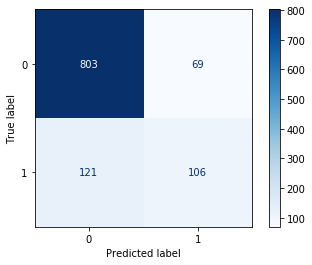

In [290]:
plot_confusion_matrix(lgrg2, clean_X_test, y_test,
                      cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g") # Formatting the numbers properly
plt.show()

# Model 3: Adjusted Penalization and Weights

In [291]:
lgrg3 = LogisticRegression(random_state = 100, C=2, class_weight='balanced')

In [296]:
X_train_transformed = ss.fit_transform(clean_X_train)
X_test_transformed = ss.transform(clean_X_test)

lgrg3.fit(clean_X_train, y_train)
y_pred_train = lgrg3.predict(clean_X_train)
y_pred_test = lgrg3.predict(clean_X_test)

/Users/colm-m-farrell/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [297]:
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric_function in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric_function(y_train, y_pred_train):.4f}")
    print(f"TEST: {metric_function(y_test, y_pred_test):.4f}")
    print("*" * 15)

Accuracy:
TRAIN: 0.7802
TEST: 0.7607
***************
Recall:
TRAIN: 0.8404
TEST: 0.8062
***************
Precision:
TRAIN: 0.4590
TEST: 0.4552
***************
F1-Score:
TRAIN: 0.5937
TEST: 0.5819
***************


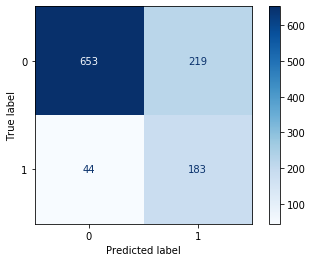

In [298]:
plot_confusion_matrix(lgrg3, X_test_eng, y_test,
                      cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g") # Formatting the numbers properly
plt.show()

## Part 6: Pick model & find best threshold

## Part 7: What drives churn?

## Part 8: What are your recommendations?